In [3]:
import pandas as pd
import numpy as np
from sklearn import metrics

In [4]:
def compute_auc(spd, accuracy):
    sorted_inds = np.argsort(spd)
    spd_ = np.hstack([min(spd), spd[sorted_inds], 1])
    accuracy_ = np.hstack([0, accuracy[sorted_inds]/100, max(accuracy)/100])
    auc_ours = metrics.auc(spd_, accuracy_)
    return auc_ours

In [48]:
dataset = 'Compas'

SPOD_FKDE = []
SPOD_ours = []
auc_FKDE_ = []
auc_ours_ = []
auc_zafar_ = []
auc_sinkhorn_ = []
accuracy_FKDE = []
accuracy_ours = []
accuracy_zafar = []
SPOD_zafar = []

accuracy_Sinkhorn = []
SPOD_Sinkhorn = []

times_ours, times_FKDE, times_zafar, times_Sinkhorn = [], [], [], []
if dataset == 'Adult':
    MMD = 0 
else:
    MMD = 1

for seed in range(10):
    df_FKDE = pd.read_csv('results-save/FKDE/{}_FKDE_{}_test.csv'.format(dataset, seed), index_col=0)
    SPOD_FKDE.append(np.array(df_FKDE.statistical_parity_classification))
    accuracy_FKDE.append(np.array(df_FKDE.accuracy))
    df_FKDE = pd.read_csv('results-save/FKDE/{}_FKDE_{}_train.csv'.format(dataset, seed), index_col=0)
    times_FKDE.append(df_FKDE.time)
    auc_FKDE_.append(compute_auc(SPOD_FKDE[seed], accuracy_FKDE[seed]))
    
    if MMD:
        df_Sinkhorn = pd.read_csv('results-save/NN_MMD_sinkhorn/{}_NN_Sinkhorn_AinX_test_{}.csv'.format(dataset, seed), index_col=0)
        SPOD_Sinkhorn.append(np.array(df_Sinkhorn.statistical_parity_classification))
        accuracy_Sinkhorn.append(np.array(df_Sinkhorn.accuracy))
        df_Sinkhorn = pd.read_csv('results-save/NN_MMD_sinkhorn/{}_NN_Sinkhorn_AinX_train_{}.csv'.format(dataset, seed), index_col=0)
        times_Sinkhorn.append(df_Sinkhorn.time)
        auc_sinkhorn_.append(compute_auc(SPOD_Sinkhorn[seed], accuracy_Sinkhorn[seed]))
    
    if dataset == 'Adult':
        df_zafar = pd.read_csv('results-save/zafar/{}_zafar_{}_test.csv'.format(dataset, 0), index_col=0)
        SPOD_zafar.append(np.array(df_zafar.statistical_parity_classification))
        accuracy_zafar.append(np.array(df_zafar.accuracy))
        df_zafar = pd.read_csv('results-save/zafar/{}_zafar_{}_train.csv'.format(dataset, 0), index_col=0)
        times_zafar.append(df_zafar.time)
        auc_zafar_.append(compute_auc(SPOD_zafar[seed], accuracy_zafar[seed]))
    else:
        df_zafar = pd.read_csv('results-save/zafar/{}_zafar_{}_test.csv'.format(dataset, seed), index_col=0)
        SPOD_zafar.append(np.array(df_zafar.statistical_parity_classification))
        accuracy_zafar.append(np.array(df_zafar.accuracy))
        df_zafar = pd.read_csv('results-save/zafar/{}_zafar_{}_train.csv'.format(dataset, seed), index_col=0)
        times_zafar.append(df_zafar.time)
        auc_zafar_.append(compute_auc(SPOD_zafar[seed], accuracy_zafar[seed]))
    df_ours = pd.read_csv('results-save/NN_energy/{}_NN_AinX_test_{}.csv'.format(dataset, seed), index_col=0)
    SPOD_ours.append(np.array(df_ours.statistical_parity_classification))
    accuracy_ours.append(np.array(df_ours.accuracy))
    df_ours = pd.read_csv('results-save/NN_energy/{}_NN_AinX_train_{}.csv'.format(dataset, seed), index_col=0)
    times_ours.append(df_ours.time)
    auc_ours_.append(compute_auc(SPOD_ours[seed], accuracy_ours[seed]))

In [49]:
SPOD_FKDE_ave = np.array(SPOD_FKDE).mean(axis=0)
SPOD_ours_ave = np.array(SPOD_ours).mean(axis=0)
accuracy_FKDE_ave = np.array(accuracy_FKDE).mean(axis=0) 
accuracy_ours_ave = np.array(accuracy_ours).mean(axis=0)
SPOD_zafar_ave = np.array(SPOD_zafar).mean(axis=0)
accuracy_zafar_ave = np.array(accuracy_zafar).mean(axis=0)
if MMD:
    SPOD_Sinkhorn_ave = np.array(SPOD_Sinkhorn).mean(axis=0)
    accuracy_Sinkhorn_ave = np.array(accuracy_Sinkhorn).mean(axis=0) 
    times_Sinkhorn = np.abs(times_Sinkhorn).mean()
    sorted_SPOD_sinkhorn = np.argsort(SPOD_Sinkhorn_ave)
    auc_sinkhorn = np.array(auc_sinkhorn_).mean()

In [50]:
auc_ours = np.array(auc_ours_).mean()
auc_zafar = np.array(auc_zafar_).mean()
auc_FKDE = np.array(auc_FKDE_).mean()

In [51]:
print('ZAFAR std AUC value {}'.format(np.std(auc_zafar_)))
print('Cho et al std AUC value {}'.format(np.std(auc_FKDE_)))
if MMD:
    print('Oneta et al std AUC value {}'.format(np.std(auc_sinkhorn_)))
print('MFL std AUC value {}'.format(np.std(auc_ours_)))

ZAFAR std AUC value 0.018601617739998477
Cho et al std AUC value 0.010918469921254658
MFL std AUC value 0.01793132815860886


In [52]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib import colors as mcolors
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

AUC values: 
 FKDE: 0.667192031870204, Zafar: 0.6254515827615312, ours: 0.6664757064363204
Training Time--> FKDE: 88.29678340148926 secs, Zafar: 0.43884503841400146 secs, ours: 78.66208689117431 secs


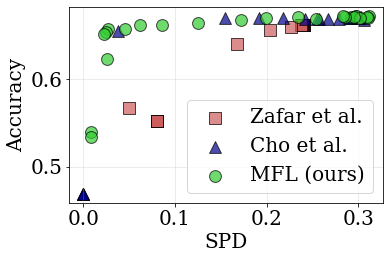

In [53]:
plt.close('all')
s_ = 140

plt.scatter(SPOD_zafar_ave, accuracy_zafar_ave/100, 
            c=colors['indianred'], label='Zafar et al.',
            marker='s', s=s_, edgecolors='k', alpha=.7)

plt.scatter(SPOD_FKDE_ave, accuracy_FKDE_ave/100,
            c=colors['darkblue'], 
            label='Cho et al.',
            marker='^', s=s_, edgecolors='k', alpha=.7)


if MMD:
    plt.scatter(SPOD_Sinkhorn_ave, accuracy_Sinkhorn_ave/100,
                c=colors['yellow'], 
                label='Oneta et al.',
                marker='d', s=s_+20, edgecolors='k', alpha=.7)
plt.scatter(SPOD_ours_ave, accuracy_ours_ave/100, 
            c=colors['limegreen'],
            label='MFL (ours)', marker='o', s=s_, edgecolors='k', alpha=.7)
plt.xlabel('SPD')
plt.ylabel('Accuracy')
plt.legend()
rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Times']
rcParams.update({'font.size': 20})
plt.grid(alpha=.3)
plt.tight_layout()
plt.savefig(dataset + '.pdf')

times_ours = np.abs(times_ours).mean()
times_FKDE = np.abs(times_FKDE).mean()
times_zafar = np.abs(times_zafar).mean()
if MMD :
    print('AUC values--> FKDE: {}, Zafar: {}, Sinkhorn: {}, ours: {}'.format(auc_FKDE, auc_zafar, auc_sinkhorn, auc_ours))
    print('Training Time--> FKDE: {} secs, Zafar: {} secs,  Sinkhorn-Div: {}, ours: {} secs'.format(times_FKDE, times_zafar, times_Sinkhorn, times_ours))
else:
    print('AUC values: \n FKDE: {}, Zafar: {}, ours: {}'.format(auc_FKDE, auc_zafar, auc_ours))
    print('Training Time--> FKDE: {} secs, Zafar: {} secs, ours: {} secs'.format(times_FKDE, times_zafar, times_ours))

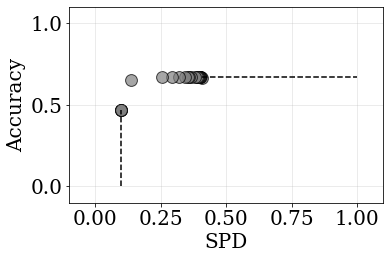

In [136]:
plt.close('all')
s_ = 140
plt.xlim([-0.1,1+0.1])
plt.ylim([-0.1,1+0.1])

plt.scatter(SPOD_FKDE_ave+0.1, accuracy_FKDE_ave/100,
    c=colors['gray'], marker='o', s=s_, edgecolors='k', alpha=.7)
# plt.scatter(min(SPOD_FKDE_ave+0.1), 0,
#     c=colors['firebrick'], marker='o', s=s_, edgecolors='k', alpha=.7)
# plt.scatter(1, max(accuracy_FKDE_ave/100),
#     c=colors['firebrick'], marker='o', s=s_, edgecolors='k', alpha=.7)
# plt.scatter(min(np.arange(1,8)/10), 0, 
#             c=colors['red'], marker='o', s=s_, edgecolors='k', alpha=.7)
# plt.scatter(min(SPOD_ours_ave+0.1), max(accuracy_ours_ave), 
#             c=colors['red'], marker='o', s=s_, edgecolors='k', alpha=.7)
plt.plot([min(SPOD_FKDE_ave+0.1), min(SPOD_FKDE_ave+0.1)], [0, min(accuracy_FKDE_ave / 100)],
         '--', color=colors['black'])
plt.plot([max(SPOD_FKDE_ave+0.1), 1], [max(accuracy_FKDE_ave / 100), max(accuracy_FKDE_ave / 100)],
         '--', color=colors['black'])
plt.xlabel('SPD')
plt.ylabel('Accuracy')
# plt.legend()

rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Times']
rcParams.update({'font.size': 20})
plt.grid(alpha=.3)
plt.tight_layout()
plt.savefig('auc_computation' + '.pdf')  